https://drive.google.com/drive/folders/1O6aImqEIcOYEROSAy_kba9DtScCOGbkm

to get the data go to this location

In [1]:
import tensorflow as tf



import keras

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

from keras.layers import Dense, Activation, Dropout, Flatten



from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator



import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


number of instances:  35888
instance length:  2304
28709 train samples
3589 test samples
Epoch 1/5
256/256 [==============================] - 940s 4s/step - loss: 1.7777 - acc: 0.2661
Epoch 2/5
256/256 [==============================] - 993s 4s/step - loss: 1.5385 - acc: 0.3956
Epoch 3/5
256/256 [==============================] - 1008s 4s/step - loss: 1.3648 - acc: 0.4739
Epoch 4/5
256/256 [==============================] - 980s 4s/step - loss: 1.2571 - acc: 0.5201
Epoch 5/5
256/256 [==============================] - 997s 4s/step - loss: 1.1720 - acc: 0.5545


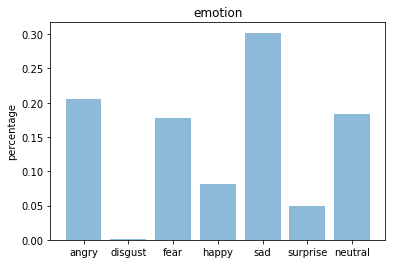

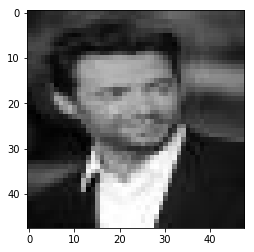

In [2]:
import tensorflow as tf



import keras

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

from keras.layers import Dense, Activation, Dropout, Flatten



from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator



import numpy as np

import matplotlib.pyplot as plt



#------------------------------

#cpu - gpu configuration

config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu

sess = tf.Session(config=config) 

keras.backend.set_session(sess)

#------------------------------

#variables

num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral

batch_size = 256

epochs = 5

#------------------------------

#read kaggle facial expression recognition challenge dataset (fer2013.csv)

#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge



with open("C:/Users/akhil/Downloads/kaggle_dataset/fer2013.tar/fer2013/fer2013/fer2013.csv") as f:

    content = f.readlines()



lines = np.array(content)



num_of_instances = lines.size

print("number of instances: ",num_of_instances)

print("instance length: ",len(lines[1].split(",")[1].split(" ")))



#------------------------------

#initialize trainset and test set

x_train, y_train, x_test, y_test = [], [], [], []



#------------------------------

#transfer train and test set data

for i in range(1,num_of_instances):

    try:

        emotion, img, usage = lines[i].split(",")

          

        val = img.split(" ")

            

        pixels = np.array(val, 'float32')

        

        emotion = keras.utils.to_categorical(emotion, num_classes)

    

        if 'Training' in usage:

            y_train.append(emotion)

            x_train.append(pixels)

        elif 'PublicTest' in usage:

            y_test.append(emotion)

            x_test.append(pixels)

    except:

        print("",end="")



#------------------------------

#data transformation for train and test sets

x_train = np.array(x_train, 'float32')

y_train = np.array(y_train, 'float32')

x_test = np.array(x_test, 'float32')

y_test = np.array(y_test, 'float32')



x_train /= 255 #normalize inputs between [0, 1]

x_test /= 255



x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)

x_train = x_train.astype('float32')

x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)

x_test = x_test.astype('float32')



print(x_train.shape[0], 'train samples')

print(x_test.shape[0], 'test samples')

#------------------------------

#construct CNN structure

model = Sequential()



#1st convolution layer

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))

model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))



#2nd convolution layer

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))



#3rd convolution layer

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))



model.add(Flatten())



#fully connected neural networks

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.2))



model.add(Dense(num_classes, activation='softmax'))

#------------------------------

#batch process

gen = ImageDataGenerator()

train_generator = gen.flow(x_train, y_train, batch_size=batch_size)



#------------------------------



model.compile(loss='categorical_crossentropy'

    , optimizer=keras.optimizers.Adam()

    , metrics=['accuracy']

)



#------------------------------



fit = True



if fit == True:

	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset

	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one

else:

	model.load_weights('/data/facial_expression_model_weights.h5') #load weights

	

#------------------------------

"""

#overall evaluation

score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])

print('Test accuracy:', 100*score[1])

"""

#------------------------------

#function for drawing bar chart for emotion preditions

def emotion_analysis(emotions):

    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

    y_pos = np.arange(len(objects))

    

    plt.bar(y_pos, emotions, align='center', alpha=0.5)

    plt.xticks(y_pos, objects)

    plt.ylabel('percentage')

    plt.title('emotion')

    

    plt.show()

#------------------------------



monitor_testset_results = False



if monitor_testset_results == True:

	#make predictions for test set

	predictions = model.predict(x_test)



	index = 0

	for i in predictions:

		if index < 30 and index >= 20:

			print(i) #predicted scores

			print(y_test[index]) #actual scores

			

			testing_img = np.array(x_test[index], 'float32')

			testing_img = testing_img.reshape([48, 48]);

			

			plt.gray()

			plt.imshow(testing_img)

			plt.show()

			

			print(i)

			

			emotion_analysis(i)

			print("----------------------------------------------")

		index = index + 1



#------------------------------

#make prediction for custom image out of test set



img = image.load_img("C:/Users/akhil/Desktop/Hugh2.jpg", grayscale=True, target_size=(48, 48))



x = image.img_to_array(img)

x = np.expand_dims(x, axis = 0)



x /= 255



custom = model.predict(x)

emotion_analysis(custom[0])



x = np.array(x, 'float32')

x = x.reshape([48, 48]);



plt.gray()

plt.imshow(x)

plt.show()

#------------------------------

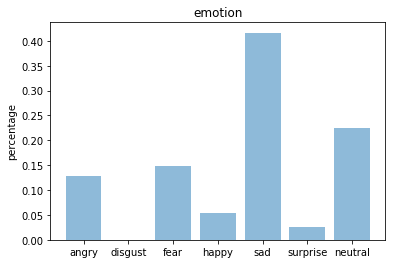

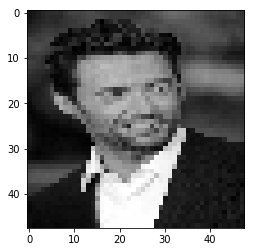

In [3]:
img = image.load_img("C:/Users/akhil/Desktop/Hugh.jpg", grayscale=True, target_size=(48, 48))



x = image.img_to_array(img)

x = np.expand_dims(x, axis = 0)



x /= 255



custom = model.predict(x)

emotion_analysis(custom[0])



x = np.array(x, 'float32')

x = x.reshape([48, 48]);



plt.gray()

plt.imshow(x)

plt.show()